## Getting Kaggle Data

In [1]:
from kaggle.api.kaggle_api_extended import KaggleApi
api = KaggleApi()
api.authenticate()

api.competition_download_files('titanic')

path_to_zip_file = 'titanic.zip'
directory_to_extract_to = "data"

import zipfile
with zipfile.ZipFile(path_to_zip_file, 'r') as zip_ref:
    zip_ref.extractall(directory_to_extract_to)

## Small EDA

In [1]:
import pandas as pd
from IPython import display
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("data/train.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

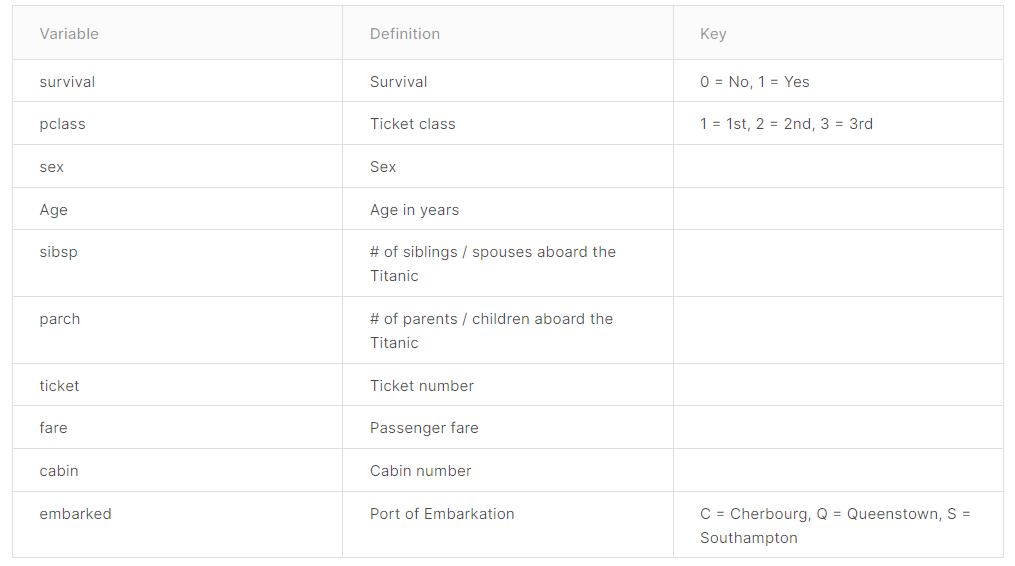

In [5]:
display.Image("titanic.png")

### Missing values

In [6]:
df.isna().values.any()

True

In [7]:
df.isnull().values.any()

True

In [8]:
df.isna().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [9]:
df.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [10]:
df.isnull().sum().sum()

866

In [11]:
print(round(df["Cabin"].isna().sum()/len(df) *100, 1), "% of missing values in Cabin")

77.1 % of missing values in Cabin


<BarContainer object of 3 artists>

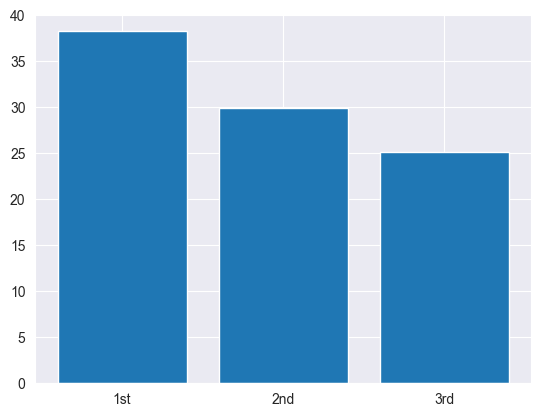

In [12]:
plt.bar(["1st", "2nd", "3rd"], df.groupby("Pclass")["Age"].mean())

In [13]:
## GUESS AGE USING CLASS
age_guess = df.groupby("Pclass")["Age"].mean()[df["Pclass"]].values
df["Age"] = df["Age"].fillna(pd.Series(age_guess)) #.where(df["Age"].isna()

In [14]:
## FILL EMBARKED WITH SOUTHAMPTON
df["Embarked"] = df["Embarked"].fillna("S")

In [15]:
df["Embarked"].unique()

array(['S', 'C', 'Q'], dtype=object)

### Distribution analysis

In [16]:
def plot_data(df, column, ax = None):
    if ax == None:
        ax = plt.subplot()
    
    surv = df.loc[df["Survived"] == 1]
    if column == "Survived":
        ax.bar(["Died", "Survived"], df["Survived"].value_counts())
        ax.set_ylabel("Passengers")
    elif column == "Pclass":

        ax.bar(["1st", "2nd", "3rd"], [df["Pclass"].value_counts()[i] for i in range(1,4)], label = "Total")
        ax.bar(["1st", "2nd", "3rd"], [surv["Pclass"].value_counts()[i] for i in range(1,4)], label = "Survived")
        ax.set_ylabel("Passengers")
        ax.legend()
        
    elif column == "Sex":
        ax.bar(df["Sex"].value_counts().keys(), df["Sex"].value_counts().values)
        ax.bar(surv["Sex"].value_counts().keys(), surv["Sex"].value_counts().values, label = "Survived")
        ax.set_ylabel("Passengers")
        ax.legend()
        
    elif column == "Age":
        sns.histplot(df["Age"], bins = 20, color = "C0", label =  "Total", ax=ax)
        sns.histplot(surv["Age"], bins = 20, color = "C1", label = "Survived", ax= ax)
        ax.legend()
        
    elif column == "SibSp":
        ax.bar(df["SibSp"].value_counts().keys(), df["SibSp"].value_counts().values, label = "Total")
        ax.bar(surv["SibSp"].value_counts().keys(), surv["SibSp"].value_counts().values, label = "Survived")
        ax.set_xlabel("SibSP")
        ax.set_ylabel("Passengers")
        ax.legend()
    
    elif column == "Parch":
        ax.bar(df["Parch"].value_counts().keys(), df["Parch"].value_counts().values, label = "Total")
        ax.bar(surv["Parch"].value_counts().keys(), surv["Parch"].value_counts().values, label = "Survived")
        ax.set_xlabel("Parch")
        ax.set_ylabel("Passengers")
        ax.legend()
        
    elif column == "Fare":
    
        sns.histplot(df["Fare"], bins = 20, color = "C0", label =  "Total", ax=ax)
        sns.histplot(surv["Fare"], bins = 20, color = "C1", label = "Survived",  ax=ax)
        ax.legend()
        
    elif column == "Fare/Class":
        ax.bar(["1st", "2nd", "3rd"], df.groupby("Pclass")["Fare"].mean().values)
        ax.set_ylabel("Average cost of ticket")
        ax.set_ylim(0, 85)
        
    elif column == "Embarked": 
        ax.bar(df["Embarked"].value_counts().keys(), df["Embarked"].value_counts().values)
        ax.bar(surv["Embarked"].value_counts().keys(), surv["Embarked"].value_counts().values)
        ax.set_ylabel("Passengers")
    else:
        raise Exception("Column not recognised, try: Survived, Pclass, Sex,Age, SibSp, Parch Fare, Fare/Class, Embarked")

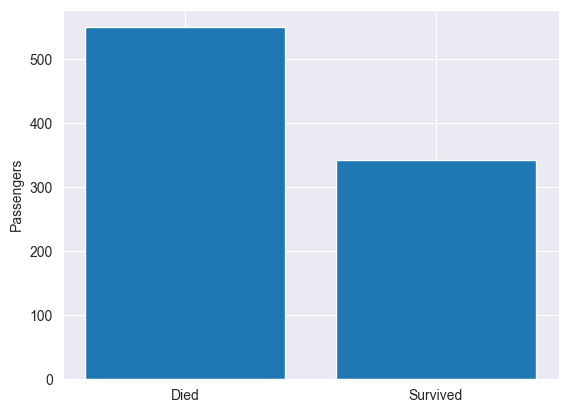

In [17]:
plot_data(df, "Survived")

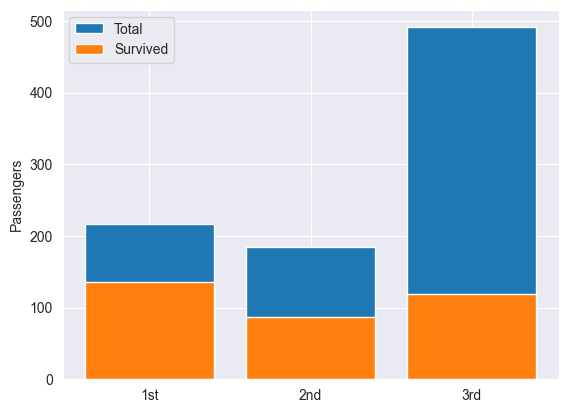

In [18]:
plot_data(df, "Pclass")
# IF YOU WERE IN HIGHER CLASS YOU HAD HIGHER CHANCE TO SURVIVE

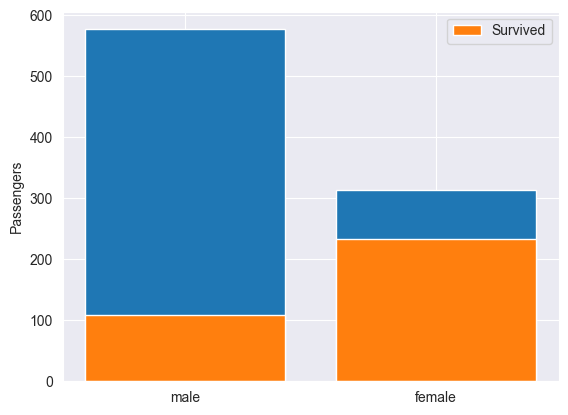

In [19]:
plot_data(df, "Sex")
# IF YOU WERE A WOMAN YOU HAD HIGHER CHANCE TO SURVIVE

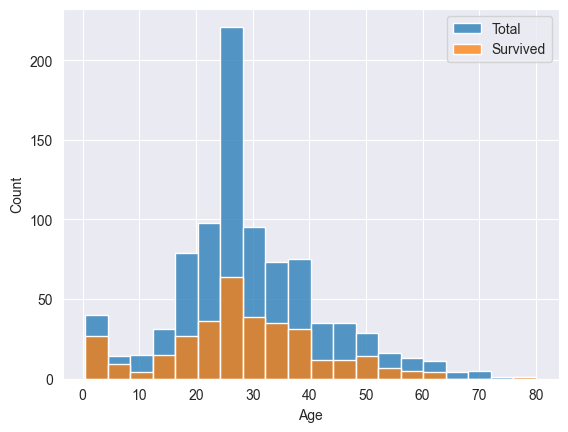

In [20]:
plot_data(df, "Age")
# BABIES SURVIVED A LOT

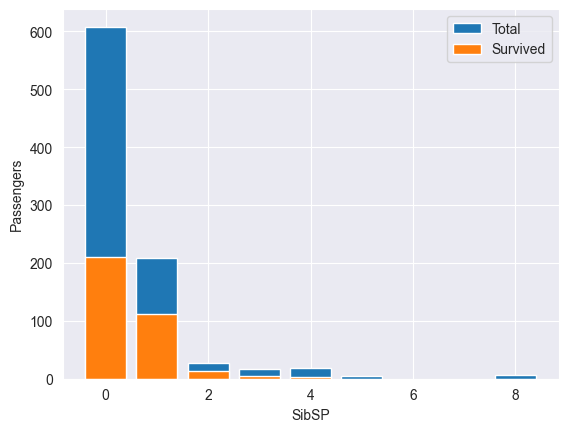

In [21]:
plot_data(df, "SibSp")

# IF YOU HAD A SIBLING LOOKS LIKE MORE LIKELY TO SURVIVE

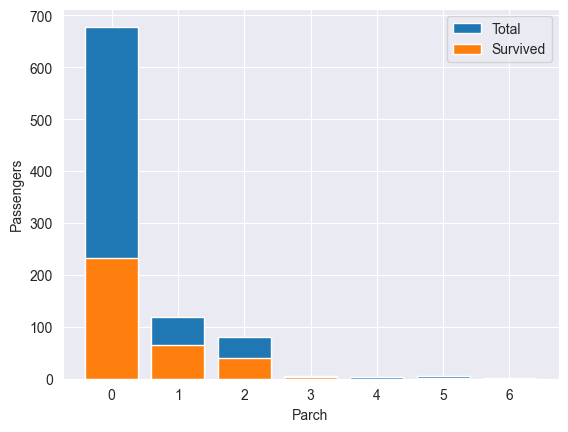

In [22]:
plot_data(df, "Parch")
# IF YOU HAD A SON/DAUGHTER LOOKS LIKE MORE LIKELY TO SURVIVE

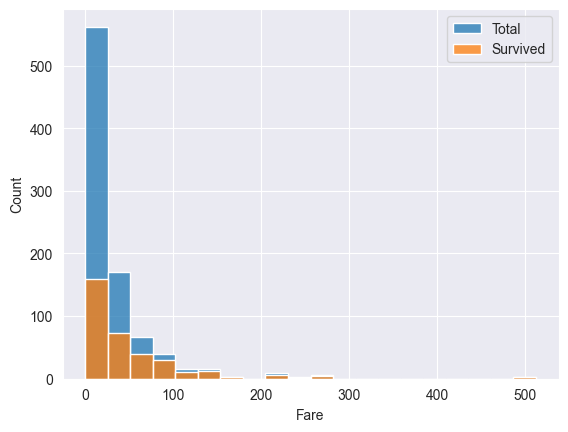

In [23]:
plot_data(df, "Fare")
# MORE YOU PAY MORE YOU SURVIVE?

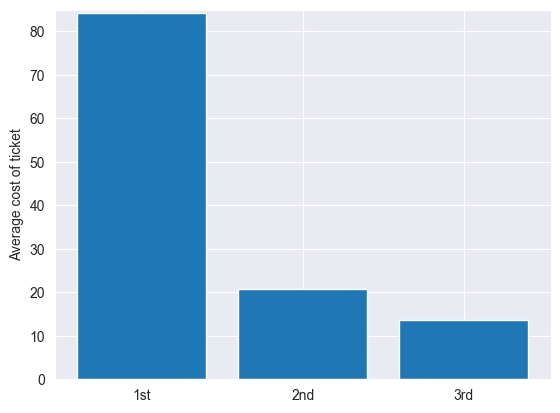

In [24]:
plot_data(df, "Fare/Class")
# PAY MORE FOR HIGHER CLASS 

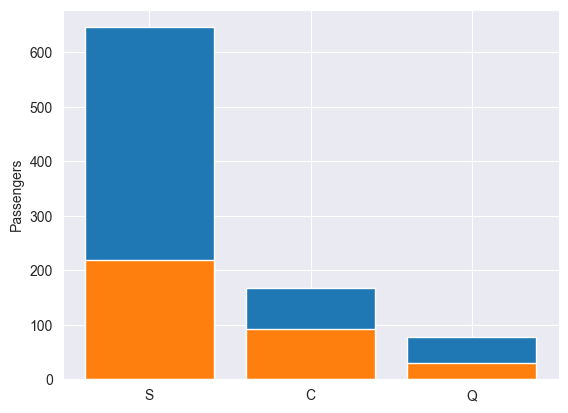

In [25]:
# COULD LOOK AT CLASS PER PORT 
plot_data(df, "Embarked")

## CTGANs

In [26]:
from ctgan import CTGANSynthesizer

In [27]:
used_columns = ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp',
       'Parch', 'Fare', 'Embarked']

discrete_columns = ['Survived', 'Pclass', 'Sex', 'SibSp',
       'Parch', 'Embarked']

In [28]:
ctgan = CTGANSynthesizer(epochs=1000)

In [29]:
ctgan.fit(df[used_columns], discrete_columns)


In [30]:
df_synth = ctgan.sample(1000)

/Users/shubov/PycharmProjects/gans/venv/lib/python3.9/site-packages/ctgan/data_transformer.py:188: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data.iloc[:, 1] = np.argmax(column_data[:, 1:], axis=1)
/Users/shubov/PycharmProjects/gans/venv/lib/python3.9/site-packages/ctgan/data_transformer.py:188: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data.iloc[:, 1] = np.argmax(column_data[:, 1:], axis=1)


In [31]:
s = df[used_columns]
s["Age"] = s["Age"].astype(int)
s["Fare"] = s["Fare"].round(2)
s[:100]

/var/folders/jc/xkd5blwd6hz99wjjbm45kwsw0000gn/T/ipykernel_19011/4053857460.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s["Age"] = s["Age"].astype(int)
/var/folders/jc/xkd5blwd6hz99wjjbm45kwsw0000gn/T/ipykernel_19011/4053857460.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s["Fare"] = s["Fare"].round(2)


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22,1,0,7.25,S
1,1,1,female,38,1,0,71.28,C
2,1,3,female,26,0,0,7.92,S
3,1,1,female,35,1,0,53.10,S
4,0,3,male,35,0,0,8.05,S
...,...,...,...,...,...,...,...,...
95,0,3,male,25,0,0,8.05,S
96,0,1,male,71,0,0,34.65,C
97,1,1,male,23,0,1,63.36,C
98,1,2,female,34,0,1,23.00,S


In [32]:
s = df_synth
s["Age"] = s["Age"].astype(int)
s["Fare"] = s["Fare"].round(2)
s

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,48,5,0,49.72,S
1,0,3,male,30,0,0,3.18,Q
2,1,2,female,30,1,2,87.12,S
3,0,3,male,21,1,2,4.43,S
4,1,1,male,75,1,0,319.49,C
...,...,...,...,...,...,...,...,...
995,0,3,male,25,0,0,30.28,S
996,1,1,female,28,1,1,11.51,C
997,1,1,female,56,1,2,121.38,S
998,0,3,male,34,1,0,6.64,S


Text(0.5, 1.0, 'Synth')

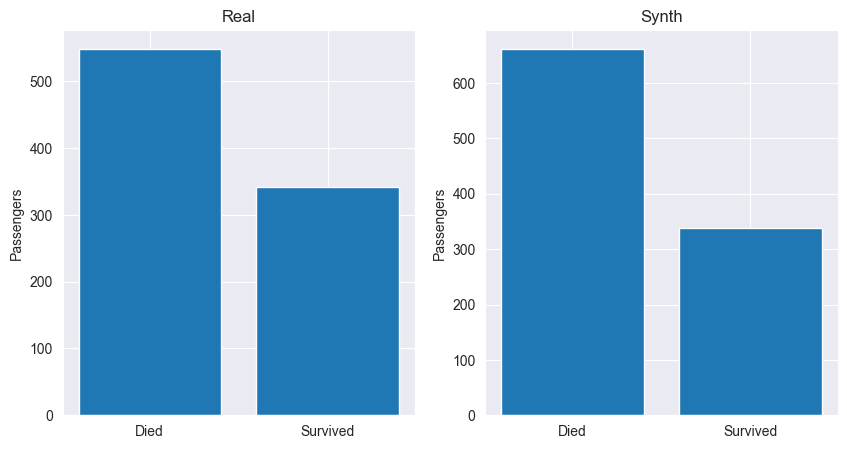

In [33]:
_, ax = plt.subplots(1,2, figsize = (10, 5))
plot_data(df, "Survived", ax[0])
plot_data(df_synth,"Survived", ax[1])
ax[0].set_title("Real")
ax[1].set_title("Synth")

Survived
Pclass
Sex
Age
SibSp
Parch
Fare
Embarked
Fare/Class


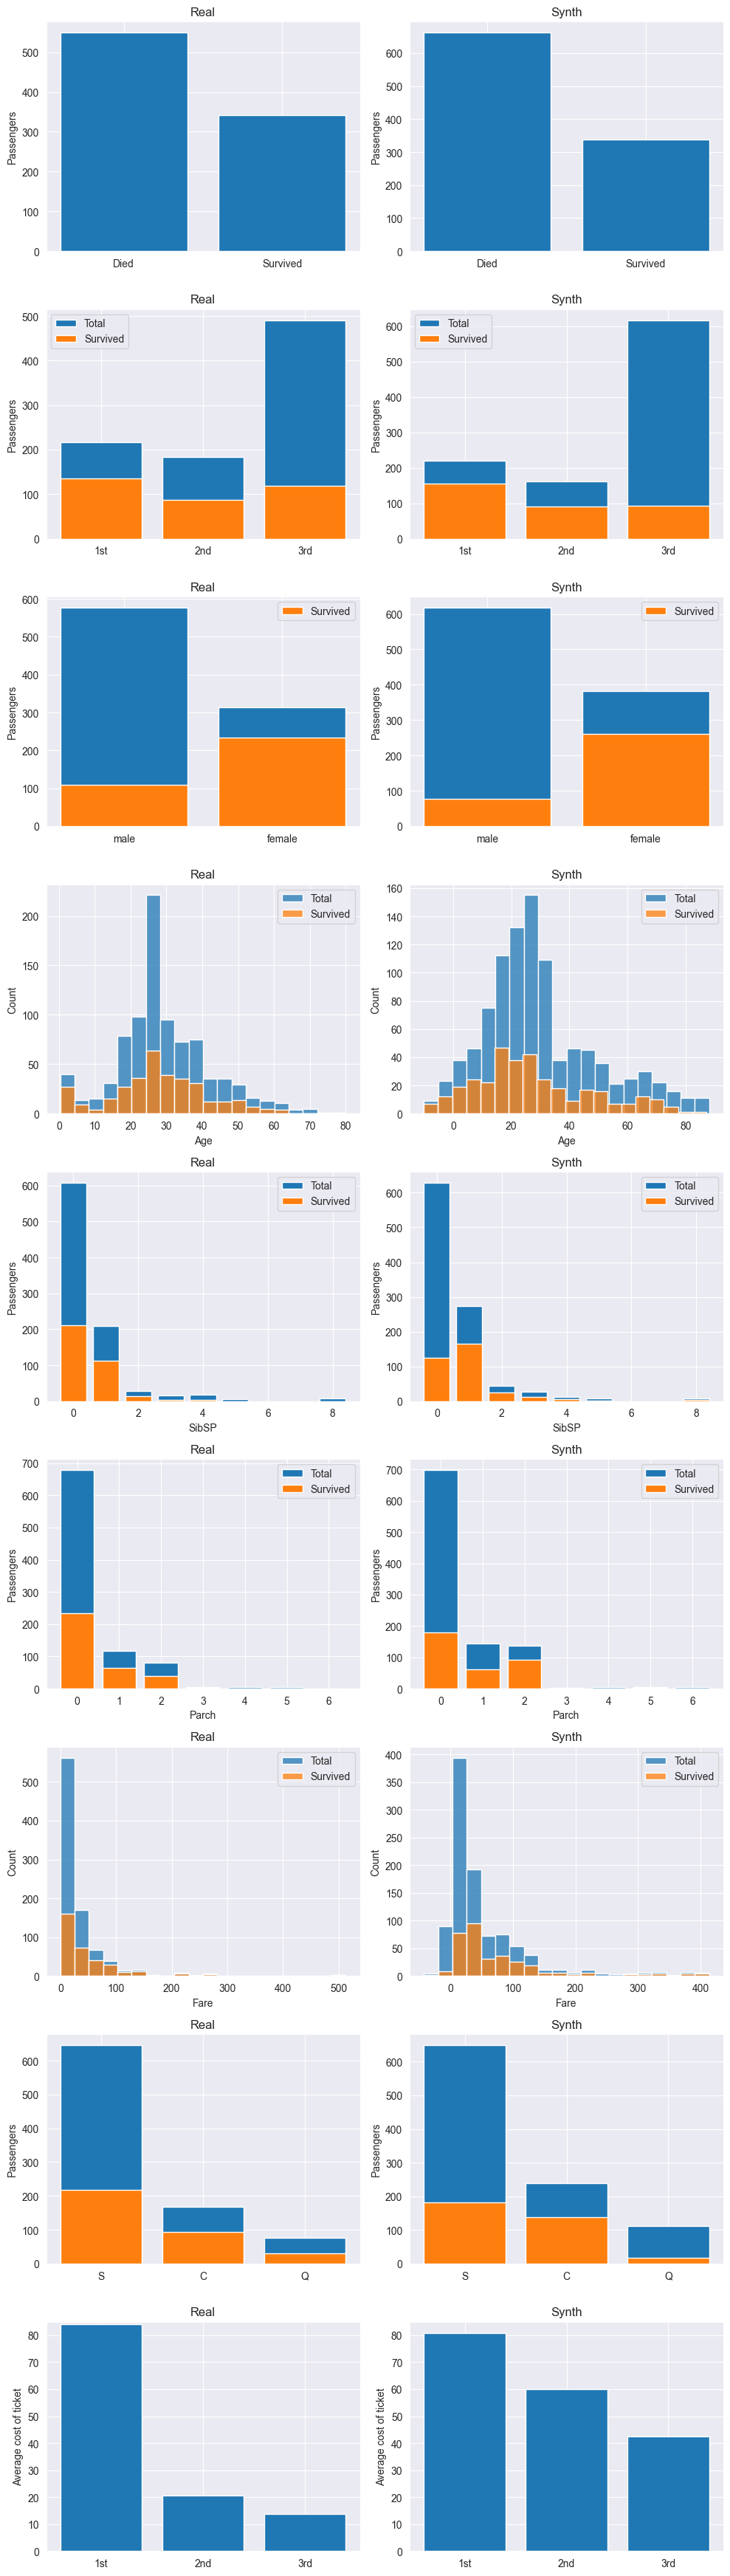

In [34]:
plot_cols =  used_columns + ["Fare/Class"]
fig, ax = plt.subplots(len(plot_cols),2, figsize = (10, 35))

for index, col  in enumerate(plot_cols):
    print(col)
    plot_data(df, col, ax[index][0])
    plot_data(df_synth, col, ax[index][1])

    ax[index][0].set_title("Real")
    ax[index][1].set_title("Synth")
fig.tight_layout()

# Evaluation

In [35]:
real_data = df[used_columns]
synthetic_data = df_synth[used_columns]

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [37]:
metadata = {
    "fields": {
        "Age": {
            "type": "numerical",
            "subtype": "integer"
        },
        "Survived": {
            "type": "categorical",
        },
        "Pclass": {
            "type": "categorical"
        },
        "Sex": {
            "type": "categorical",
        },
        "SibSp": {
            "type": "numerical",
            "subtype": "float"
        },
        "Parch": {
            "type": "categorical",
        },
        "Fare": {
            "type": "numerical",
            "subtype": "float"
        },
        "Embarked": {
            "type": "categorical",
        }
    }
}

In [38]:
from sdv.evaluation import evaluate

In [39]:
evaluate(df_synth[used_columns], df[used_columns])

0.9337010100524039

In [40]:
from sdmetrics.reports.single_table import QualityReport
report = QualityReport()
report.generate(real_data, synthetic_data, metadata)

Creating report: 100%|██████████| 4/4 [00:00<00:00, 43.43it/s]



Overall Quality Score: 88.16%

Properties:
Column Shapes: 91.09%
Column Pair Trends: 85.23%


In [41]:
report.get_details(property_name='Column Shapes')

,Column,Metric,Quality Score
0,Age,KSComplement,0.819823
1,SibSp,KSComplement,0.922621
2,Fare,KSComplement,0.787641
3,Survived,TVComplement,0.978162
4,Pclass,TVComplement,0.921490
5,Sex,TVComplement,0.970413
6,Parch,TVComplement,0.833568
7,Embarked,TVComplement,0.973580


In [41]:
from sdmetrics.single_table import NewRowSynthesis
NewRowSynthesis.compute(real_data, synthetic_data)

0.997

In [50]:
fig = report.get_visualization(property_name='Column Shapes')
fig.show()

In [47]:
from sdmetrics.reports import utils
for column_name in used_columns:
    fig = utils.get_column_plot(
        real_data,
        synthetic_data,
        column_name,
        metadata
    )
    fig.show()

In [48]:
from sdmetrics.reports import utils

column_names=["Age", "Fare"]
fig = utils.get_column_pair_plot(
    real_data,
    synthetic_data,
    column_names,
    metadata

)
fig.show()